**Installing ronda and rdkit**

In [2]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f  -p /usr/local
!conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-09-22 17:29:24--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   137MB/s    in 0.6s    

2023-09-22 17:29:25 (137 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [3]:
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bioactivity_preprocessed_data (1).csv to bioactivity_preprocessed_data (1).csv


In [5]:
df = pd.read_csv('bioactivity_preprocessed_data (1).csv')

**Calculate the Lipinski Descriptor**

The rule describes molecular properties important for a drug's pharmacokinetics in the human body, including their absorption, distribution, metabolism, and excretion ("ADME"). However, the rule does not predict if a compound is pharmacologically active.
The Lipinski rule states that;
Molecular weight < 500
Octanol-water partition coefficient (LOGP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

**Import Libraries**

In [6]:
!pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


**Calculate Descriptors**

In [7]:
def lipinski(smiles, verbose=False):

  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData=np.arange(1,1)
  i=0
  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])
    if(i==0):
      baseData=row
    else:
      baseData=np.vstack([baseData, row])
      i=i+1
  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData, columns = columnNames)

  return descriptors

In [8]:

def lipinski(smiles_list, verbose=False):
    descriptors_data = []

    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            desc_MolWt = Descriptors.MolWt(mol)
            desc_MolLogP = Descriptors.MolLogP(mol)
            desc_NumHDonors = Lipinski.NumHDonors(mol)
            desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

            descriptors_data.append([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=descriptors_data, columns=column_names)

    return descriptors

In [9]:
df_lipinski = lipinski(df.canonical_smiles)

**Combine Dataframe**

MW- Molecular Weight

LogP- Solubility

NumHDonors- Relative bond of donors

NumHAcceptors- Relative bond of acceptors

In [10]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0,5
1,415.589,3.81320,0,2
2,421.190,2.66050,0,4
3,293.347,3.63080,0,3
4,338.344,3.53900,0,5
...,...,...,...,...
128,338.359,3.40102,0,5
129,296.366,3.44330,0,3
130,276.291,4.09564,0,3
131,278.307,3.29102,0,3


In [11]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [12]:
df_combined = pd.concat([df, df_lipinski], axis = 1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0,5
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0,3
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0,3
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0,3


**Convert IC50 to pIC50**

To all **IC50** data to a more uniformly distributed, **pIC50** will be converted to a negative logarithimic scale which is essentially **-log10(IC50)**

This custom function pIC50() will accept a DataFrame as input and will

*   Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10-9
*   Take the molar value and apply -log10
*   Delete the standard_value column and create a new pIC50column






In [14]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Convert nM to M
        pIC50.append(-np.log10(molar))

    # Assign the 'pIC50' column outside of the loop
    input['pIC50'] = pIC50

    # Remove the 'standard_value_norm' column
    x = input.drop('standard_value_norm', axis=1)

    return x

In [15]:
df_combined.standard_value.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [16]:
-np.log10((10**-9)*100000000)

1.0

In [17]:
-np.log10((10**-9)*10000000000)

-1.0

In [18]:
def norm_value(input):
  norm = []
  for i in input['standard_value']:
    if i > 1000000000:
      i = 100000000
    norm.append(i)

  input['standard_value_norm'] = norm
  x = input.drop('standard_value', 1)
  return x

**First apply the norm_value() function so that the values in the standard_value column is normalized**

In [19]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-18-a980a8f88e8f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0,5,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0,2,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0,5,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,10700.0


In [20]:
df_norm.standard_value_norm.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [21]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0,5,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,4.970616


In [22]:
df_final.pIC50.describe()

count    133.000000
mean       4.718269
std        0.920910
min        3.000000
25%        4.154902
50%        4.756962
75%        4.995679
max        7.301030
Name: pIC50, dtype: float64

In [23]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0,3,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0,3,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0,3,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,4.970616


**Exploratory Data Analysis (chemical Space Analysis) via Lipinski descriptors**

**Import Library**

In [24]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

**Frequency plot of the 2 bioactivity classes**

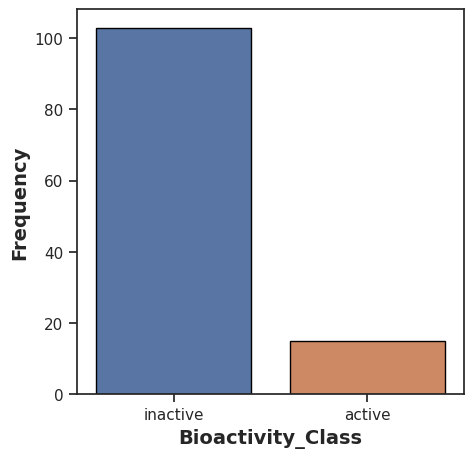

In [26]:
plt.figure(figsize =(5,5))
sns.countplot(x='bioactivity_class', data = df_2class, edgecolor = 'black')
plt.xlabel('Bioactivity_Class', fontsize=14, fontweight ='bold')
plt.ylabel('Frequency', fontsize =14, fontweight = 'bold')
plt.savefig('plot_bioactivity_class.pdf')

**Scatter Plot of MW versus LogP **

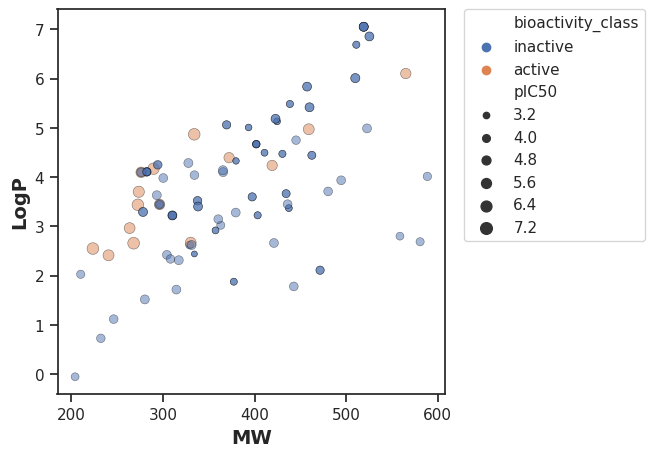

In [27]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x= 'MW', y = 'LogP', data = df_2class, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'black', alpha = 0.5)
plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.savefig('plot_MW_vs_LogP.pdf')

**Box Plots**

**pIC50 Value**

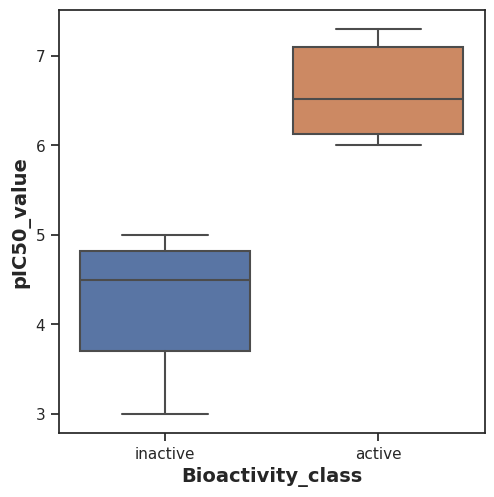

In [31]:
plt.figure(figsize = (5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight = 'bold')
plt.ylabel('pIC50_value', fontsize= 14, fontweight= 'bold')
plt.savefig('plot_pIC50.pdf')

**Statistical analysis using Mann-Whitney test**

In [55]:
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, df_2class, alpha=0.05, verbose=False):
    # Select the relevant columns from df_2class
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]

    # Split the data into 'active' and 'inactive' groups
    active = df[df['bioactivity_class'] == 'active'][descriptor]
    inactive = df[df['bioactivity_class'] == 'inactive'][descriptor]

    # Perform the Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive, alternative='two-sided')

    # Interpret the results based on the p-value
    if p < alpha:
        interpretation = 'Reject the null hypothesis: Significant difference between groups.'
    else:
        interpretation = 'Fail to reject the null hypothesis: No significant difference between groups.'

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p-value': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save the results to a CSV file
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename, index=False)

    return results


In [56]:
results = mannwhitney('pIC50', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,pIC50,1545.0,4.428384e-10,0.05,Reject the null hypothesis: Significant differ...


**MW**

Text(0, 0.5, 'MW')

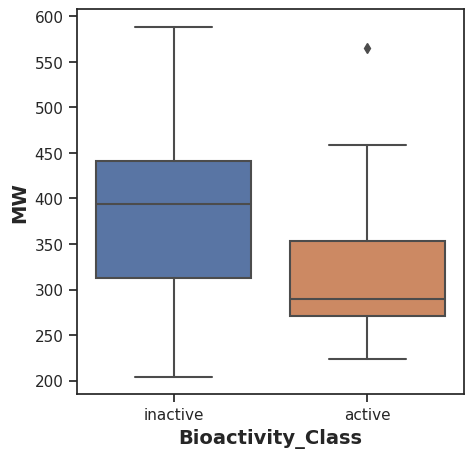

In [33]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'bioactivity_class', y ='MW', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize =14, fontweight = 'bold')
plt.ylabel('MW', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_mw.pdf')

In [57]:
results = mannwhitney('MW', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,MW,408.5,0.003313,0.05,Reject the null hypothesis: Significant differ...


**LogP**

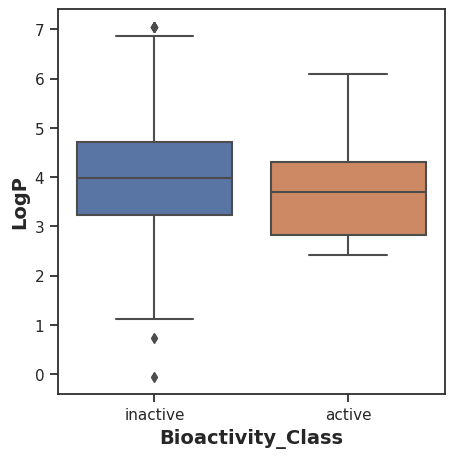

In [59]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_logp.pdf')

**Statistical analysis for Mannwhitney test**

In [60]:
results = mannwhitney('LogP', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,LogP,712.5,0.630683,0.05,Fail to reject the null hypothesis: No signifi...


**NumHDonor**

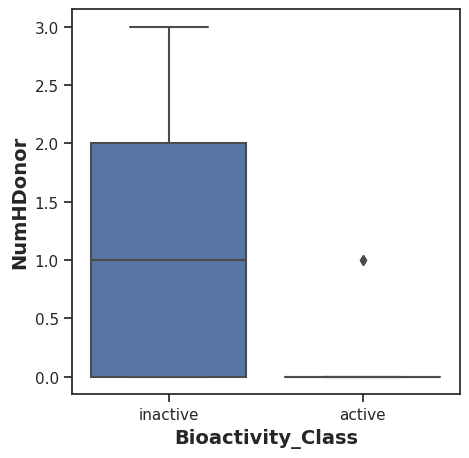

In [63]:
plt.figure(figsize= (5,5))
sns.boxplot(x ='bioactivity_class', y = 'NumHDonors', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHDonor', fontsize = 14, fontweight ='bold')
plt.savefig('plt_NumHDonor.pdf')

**bold text**

**Statistical analysis for Mannwhitney test**

In [64]:
results = mannwhitney('NumHDonors', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,NumHDonors,298.5,0.000053,0.05,Reject the null hypothesis: Significant differ...


**NumHAcceptors**

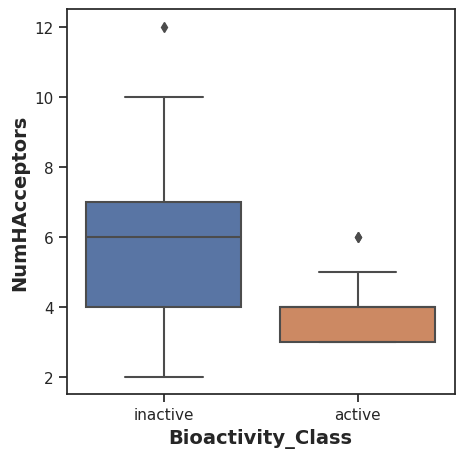

In [65]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)
plt.xlabel('Bioactivity_Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('NumHAcceptors', fontsize = 14, fontweight = 'bold')
plt.savefig('plt.NumHAcceptors.pdf')

In [66]:
results = mannwhitney('NumHAcceptors', df_2class)
results

,Descriptor,Statistics,p-value,alpha,Interpretation
0,NumHAcceptors,414.0,0.003402,0.05,Reject the null hypothesis: Significant differ...


### **Interpretation of Statistical Results**

**Box Plots**                                                                         

**pIC50 values**

pIC50 values, the actives and inactives displayed statistical difference, which is expected since the threshold values (IC50 < 1000nM = Active, IC50 > 1000nM = Inactive as depicted in; pIC50 > 6 = Active and pIC50 < 5 = Inactive).

**Lipinski's Discriptors**                                                        
of MW, LogP, NumHDnors and NumHAcceptors, only LogP exhibited no significant difference between the active and inactive, while the other three shows statistical significance between the active and inactive.

In [72]:
!zip -r results.zip . -i "*.csv" "*.pdf"

  adding: bioactivity_preprocessed_data (1).csv (deflated 80%)
  adding: plot_pIC50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 15%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 15%)
  adding: mannwhitneyu_LogP.csv (deflated 14%)
  adding: mannwhitneyu_MW.csv (deflated 14%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 14%)
  adding: plot_logp.pdf (deflated 37%)
  adding: plt.NumHAcceptors.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plt_NumHDonor.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: sample_data/mnist_train_small.csv (deflated 88%)
  adding: sample_data/california_housing_train.csv (deflated 79%)
  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/mnist_test.csv (deflated 88%)
